# 첫 번째 합성곱 신경망

## 라이브러리 임포트

In [2]:
import numpy as np

from keras.layers import Input, Flatten, Dense, Conv2D, BatchNormalization, LeakyReLU, Dropout, Activation
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import to_categorical
import keras.backend as K 

from keras.datasets import cifar10

## 데이터 적재

In [3]:
NUM_CLASSES = 10

In [4]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [5]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

In [6]:
x_train[54, 12, 13, 1] 

0.36862746

## 모델 만들기

In [7]:
input_layer = Input(shape=(32,32,3))

conv_layer_1 = Conv2D(
    filters = 10
    , kernel_size = (4,4)
    , strides = 2
    , padding = 'same'
    )(input_layer)

conv_layer_2 = Conv2D(
    filters = 20
    , kernel_size = (3,3)
    , strides = 2
    , padding = 'same'
    )(conv_layer_1)

flatten_layer = Flatten()(conv_layer_2)

output_layer = Dense(units=10, activation = 'softmax')(flatten_layer)

model = Model(input_layer, output_layer)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 10)        490       
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 20)          1820      
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 10)                12810     
                                                                 
Total params: 15120 (59.06 KB)
Trainable params: 15120 (59.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# 셀 수                     # 원리                                                                                  # Param 수                  # Layer 구분    # 원리
32*32*3 == 3072                                                                                                                                ## input
32/2 * 32/2 * 10 == 2560    # 행/strides x 열/strides x 10(filters) // (filters=10, strides=2, padding='same')     (4*4*3 + 1) * 10 == 490     # conv2d        # [4 x 4(conv layer1 kernel size) x 3(input filter) + 1(상수항)] x 10(conv layer1 filters)
16/2 * 16/2 * 20 == 1280    # 행/strides x 열/strides x 20(filters) // (filters=20, strides=2, padding='same')     (3*3*10 + 1) * 20 == 1820   # conv2d        # [3 x 3(conv layer2 kernel size) x 10(conv layer1 filters) + 1(상수항)] x 20(conv layer2 filters)
8*8*20 == 1280                                                                                                                                 ## flatten
10                          # units=10                                                                             (1280+1)*10 == 12810        # Dense         # [1280(flatten layer cell count) + 1(상수항)] * 10(dense layer units)


In [10]:
input_layer = Input((32,32,3))

x = Conv2D(filters = 32, kernel_size = 3, strides = 1, padding = 'same')(input_layer)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 32, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 1, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Conv2D(filters = 64, kernel_size = 3, strides = 2, padding = 'same')(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)


x = Flatten()(x)

x = Dense(128)(x)
x = BatchNormalization()(x)
x = LeakyReLU()(x)
x = Dropout(rate = 0.5)(x)

x = Dense(NUM_CLASSES)(x)
output_layer = Activation('softmax')(x)

model = Model(input_layer, output_layer)

In [11]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 batch_normalization_1 (Bat  (None, 16, 16, 32)        128       
 chNormalization)                                          

In [20]:
32*32*3 == 3072             ## input
(3*3*3 + 1) * 32 == 896     # conv2d


(3*3*32 + 1) * 32 == 1820   # conv2d

(3*3*32 + 1) * 64 == 18496  # conv2d

(3*3*64 + 1) * 64 == 36928  # conv2d


8*8*64 == 4096              ## flatten
(4096+1)*128 == 524416      # Dense

(128+1)*10 == 1290          # Dense

1290

## 모델 훈련

In [21]:
opt = Adam(lr=0.0005)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [22]:
model.fit(x_train
          , y_train
          , batch_size=32
          , epochs=10
          , shuffle=True
          , validation_data = (x_test, y_test))

Epoch 1/10



1563/1563 [==============================] - 25s 15ms/step - loss: 1.5002 - accuracy: 0.4698 - val_loss: 1.4255 - val_accuracy: 0.5009
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1146 - accuracy: 0.6055 - val_loss: 1.0462 - val_accuracy: 0.6427
Epoch 3/10
1563/1563 [==============================] - 24s 16ms/step - loss: 0.9761 - accuracy: 0.6581 - val_loss: 0.9271 - val_accuracy: 0.6790
Epoch 4/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8967 - accuracy: 0.6863 - val_loss: 0.8805 - val_accuracy: 0.6879
Epoch 5/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.8415 - accuracy: 0.7039 - val_loss: 0.8749 - val_accuracy: 0.6951
Epoch 6/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7924 - accuracy: 0.7246 - val_loss: 0.7872 - val_accuracy: 0.7295
Epoch 7/10
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7467 - accuracy: 0.7407 - val_loss: 0.8052 - val_accura

In [36]:
model.layers

In [35]:
model.layers[5].get_weights()

[array([0.7896079 , 1.2185564 , 0.686227  , 0.9736326 , 0.83083624,
        0.90528494, 0.77308804, 1.1587152 , 1.149669  , 1.5332235 ,
        1.21201   , 1.2712588 , 0.6933438 , 1.0083691 , 1.4955343 ,
        0.5807339 , 0.8276213 , 0.80718005, 1.2219722 , 1.2261397 ,
        1.2041212 , 0.71801114, 0.62880903, 1.0862628 , 0.77241826,
        0.6992362 , 0.7253477 , 1.295146  , 1.0603266 , 0.7937717 ,
        0.7969824 , 0.71112645], dtype=float32),
 array([-0.35901454, -0.11549123,  0.02414603, -0.2743574 , -0.31418806,
        -0.21494529, -0.2931896 , -0.12988329, -0.14341961, -0.19077486,
        -0.34297645, -0.31686968, -0.36573538, -0.14046915, -0.2877381 ,
        -0.01321336, -0.08009901, -0.12501675, -0.15180619, -0.30313215,
        -0.3305875 , -0.06827974, -0.23160906, -0.13278162, -0.04718206,
        -0.33499837, -0.41484356, -0.08998692, -0.05888279, -0.17941572,
        -0.17261899, -0.12265493], dtype=float32),
 array([ 2.0976644 ,  0.19137006, -2.2434118 ,  0.4125

## 모델 평가

In [37]:
model.evaluate(x_test, y_test, batch_size=1000)

10/10 [==============================] - 1s 91ms/step - loss: 0.7617 - accuracy: 0.7441


[0.7617372274398804, 0.7440999746322632]

In [38]:
CLASSES = np.array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis = -1)]
actual_single = CLASSES[np.argmax(y_test, axis = -1)]

313/313 [==============================] - 2s 5ms/step


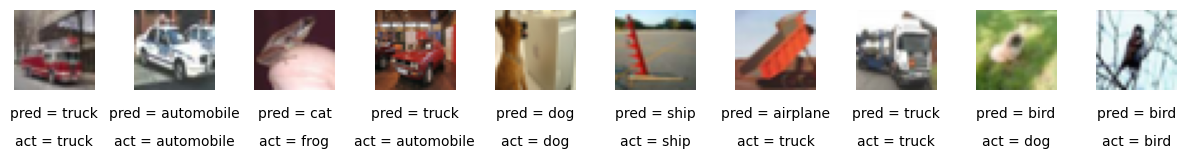

: 

In [39]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.5, wspace=0.5)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i+1)
    ax.axis('off')
    ax.text(0.5, -0.35, 'pred = ' + str(preds_single[idx]), fontsize=10, ha='center', transform=ax.transAxes) 
    ax.text(0.5, -0.7, 'act = ' + str(actual_single[idx]), fontsize=10, ha='center', transform=ax.transAxes)
    ax.imshow(img)